In [1]:
cd ./2.Exercise1/
pwd

ans = /Users/dann/Documents/Projects/repos/MachineLearning/2.Exercise1


## Linear Regression with One Variable

### Goal of this exercise:
> Predict the profit of delivering food to multiple cities.

**Data:**
* population of the city (in 10,000s)
* profit (negative value indicates loss; in $10,000s)

### Loading data:

In [2]:
data = load('ex1data1.txt');
x = data(:, 1);
y = data(:, 2);
[m, n] = size(x);
m, n

m =  97
n =  1


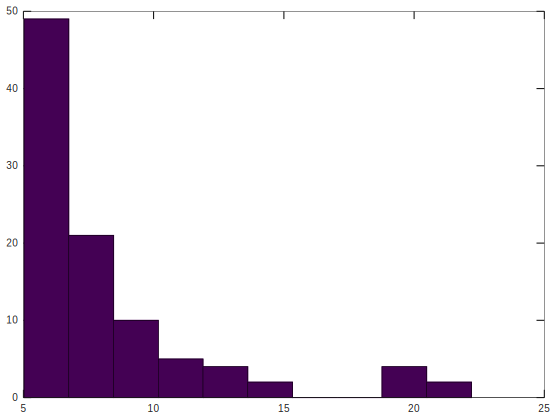

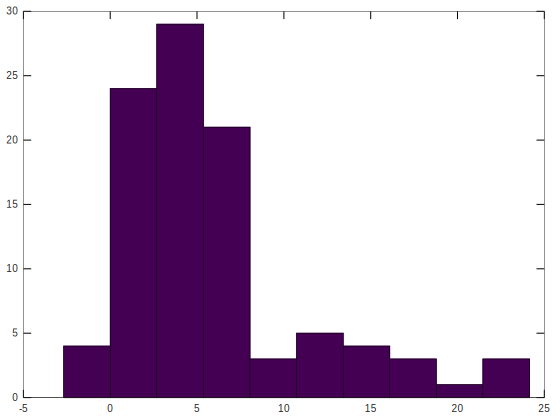

In [3]:
figure(1);
hist(x);
figure(2);
hist(y);

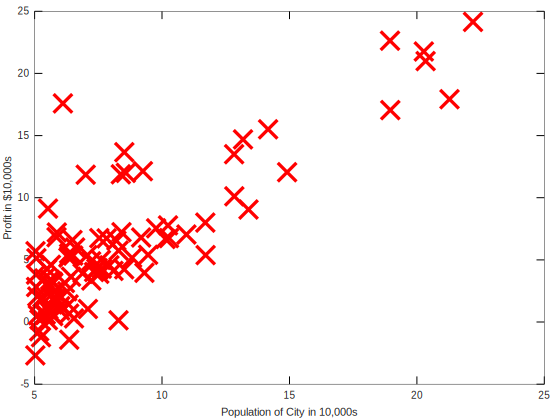

In [4]:
plot(x, y, 'rx', 'MarkerSize', 10);
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');

### Gradient Descent:

#### Cost function:

In [34]:
function [cost] = computeCost(X, y, theta)
    m = length(X);
    cost = (2 * m) ^ -1 * sum((X * theta - y) .^ 2);
endfunction

#### Gradient descent algorithm:

In [37]:
function [theta] = gradientDescent(x, y, ITERATIONS, ALPHA)

    [m, n] = size(x);
    
    X = [ones(m, 1), x];
    theta = zeros(n + 1, 1);
    
    costs = zeros(1, ITERATIONS + 1);
    costs(1) = computeCost(X, y, theta);
    
    for iter = 1:ITERATIONS
        theta = theta - (ALPHA * (m ^ -1)) * sum(((X * theta) - y) .* X)';
        costs(iter + 1) = computeCost(X, y, theta);
    end;
    
    plot(0:ITERATIONS, costs);
    xlabel('iteration');
    ylabel('MSE');
    title('Training evolution');
endfunction

ans =

  -3.6303
   1.1664



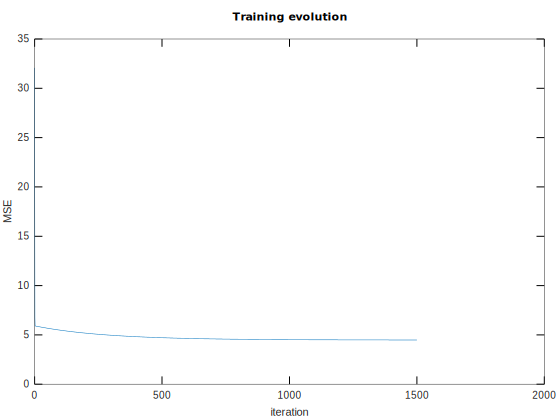

In [38]:
gradientDescent(x, y, ITERATIONS, ALPHA)

## Linear Regression with Multiple Variables:

### Goal of the exercise:

> Predict the prices of houses.

#### Data:

* size of the house (in sq feet)
* number of bedrooms
* price of the house

In [67]:
data = load('ex1data2.txt');
x = data(:, 1:2);
y = data(:, 3);

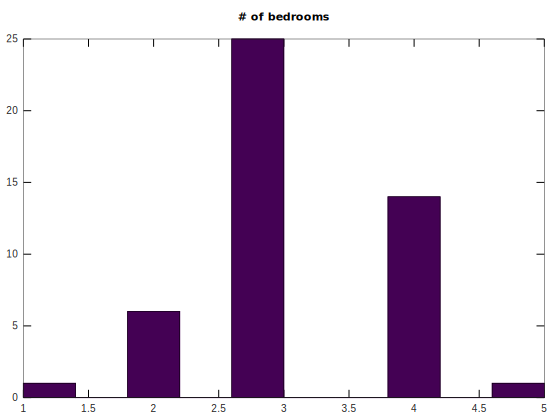

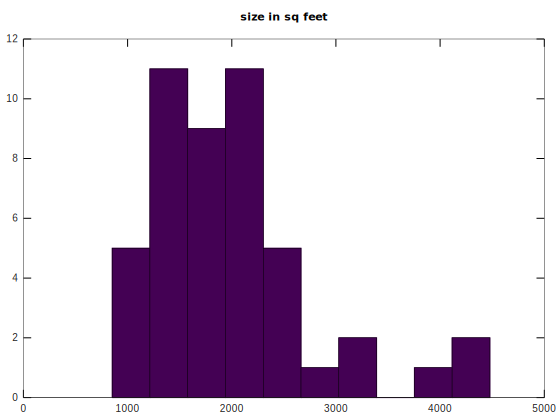

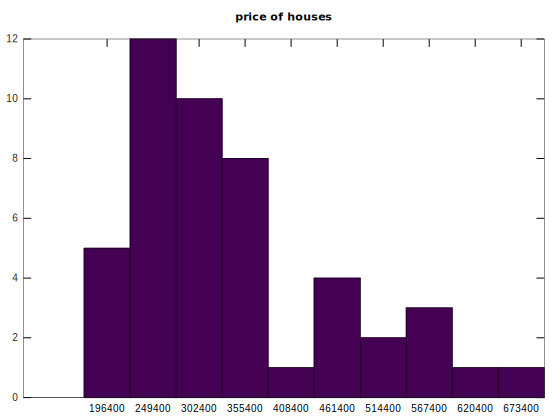

In [43]:
figure(1);
hist(x(:, 1));
title('size in sq feet');

figure(2);
hist(x(:, 2));
title('# of bedrooms');

figure(3);
hist(y);
title('price of houses');

### Feature regularization:

> Using standard deviation

In [61]:
stdevs = std(x)
means = mean(x)

stdevs =

   794.70235     0.76098

means =

   2000.6809      3.1702



In [68]:
x = (x - means) ./ stdevs;

### Cost function:

In [70]:
function [cost] = costFunction(X, y, theta)
    m = length(X);
    cost = (2 * m) ^ (-1) * (X * theta - y)' * (X * theta - y);
endfunction

### Gradient descent:

theta =

   340397.96354
   109848.00846
    -5866.45408



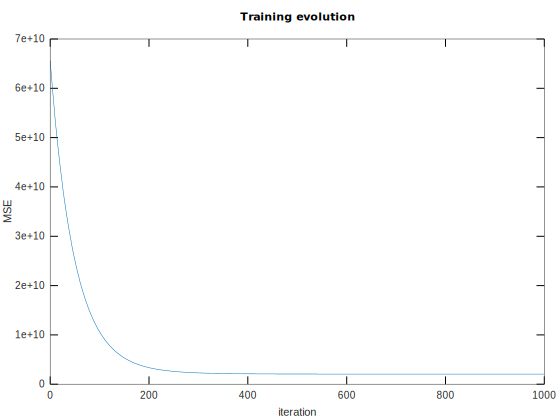

In [84]:
theta = gradientDescent(x, y, 1000, 0.01)

In [85]:
prediction = [1 1650 3] * theta

prediction =  181572012.56070


### Normal equation:

In [79]:
function [theta] = normalEquation(x, y)

    m = length(x);
    X = [ones(m, 1), x];
    
    theta = pinv(X' * X) * X' * y;
endfunction

In [82]:
theta = normalEquation(x, y)

theta =

   340412.65957
   110631.05028
    -6649.47427



In [83]:
prediction = [1 1650 3] * theta

prediction =  182861697.19686
